Imports iniciais

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from threadpoolctl import threadpool_limits
import spacy
spacy.cli.download('pt_core_news_md')
import re
import string
from nltk.stem import RSLPStemmer
import nltk
import matplotlib.pyplot as plt
nltk.download('rslp')

✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [4]:
def proccess_text(text):
    nlp = spacy.load("pt_core_news_md")

    doc = nlp(text)

    tokens = [token.text for token in doc]

    tokens_normalizados = [token.lower() for token in tokens]

    tokens_filtrados = [
        token for token in tokens_normalizados
        if token not in nlp.Defaults.stop_words and token not in string.punctuation
    ]
    stemmer = RSLPStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens_filtrados]
    lemmatized_tokens = [token.lemma_ for token in nlp(' '.join(tokens_filtrados))]

    return tokens_filtrados, stemmed_tokens, lemmatized_tokens

def tokens_query(query):
    tokens, _, _ = proccess_text(query)
    return tokens

def stem_query(query):
    _, stemmed_query, _ = proccess_text(query)
    return stemmed_query

def lemma_query(query):
    _, _, lemmatized_query = proccess_text(query)
    return lemmatized_query



In [5]:
def bag_of_words(corpus):
    bow_vec = CountVectorizer()
    x_bow = bow_vec.fit_transform(corpus)
    dt_bow = pd.DataFrame(x_bow.toarray(), columns=bow_vec.get_feature_names_out())
    return bow_vec, x_bow, dt_bow

def tf_idf(corpus):
    tfidf_vec = TfidfVectorizer()
    x_tfidf = tfidf_vec.fit_transform(corpus)
    dt_tfidf = pd.DataFrame(x_tfidf.toarray(), columns=tfidf_vec.get_feature_names_out())
    return tfidf_vec, x_tfidf, dt_tfidf


# ler arquivo CSV filmes_processados.csv
data_filmes_processados = pd.read_csv('filmes_processados_csv/filmes_processados.csv')
data_comentarios_processados = pd.read_csv('filmes_processados_csv/comentarios_processados.csv')

Criação dos corpus

In [6]:
corpus_filmes_tokens = data_filmes_processados['resumo_tokens'].tolist()
corpus_filmes_stems = data_filmes_processados['resumo_stem'].tolist()
corpus_filmes_lemmas = data_filmes_processados['resumo_lema'].tolist()

corpus_comentarios_tokens = data_comentarios_processados['conteudo_tokens'].tolist()
corpus_comentarios_stems = data_comentarios_processados['conteudo_stem'].tolist()
corpus_comentarios_lemmas = data_comentarios_processados['conteudo_lema'].tolist()


BoW Filmes Tokens

In [7]:
print("Matriz Documento-Termo (BoW):")
bow_filmes_tokens_vec, x_bow_filmes_tokens, bow_filmes_tokens = bag_of_words(corpus_filmes_tokens)
bow_filmes_tokens

Matriz Documento-Termo (BoW):


,10,100,11,117,118,12,126,15,156,177,...,órfãs,ótima,ótimas,ótimo,ótimos,última,últimos,única,únicas,único
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,1,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0


BoW Filmes Stems

In [8]:
print("Matriz Documento-Termo (BoW):")
bow_filmes_stems_vec,  x_bow_filmes_stems, bow_filmes_stems = bag_of_words(corpus_filmes_stems)
bow_filmes_stems

Matriz Documento-Termo (BoW):


,10,100,11,117,118,12,126,15,156,177,...,óbv,óbvi,ócul,ódi,óper,órbit,órfã,ótim,últ,únic
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,2,0,0


BoW Filmes Lemmas

In [9]:
print("Matriz Documento-Termo (BoW):")
bow_filmes_lemas_vec, x_bow_filmes_lemas, bow_filmes_lemas = bag_of_words(corpus_filmes_lemmas)
bow_filmes_lemas

Matriz Documento-Termo (BoW):


,10,100,11,117,118,12,126,15,156,177,...,órbita,órfão,órfãs,ótim,ótima,ótimm,ótimo,ótimos,último,único
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,1,0,0,1,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0


TF-IDF Filmes Tokens

In [10]:
print("Matriz Documento-Termo (TF-IDF):")
tfidf_filmes_tokens_vec, x_tfidf_filmes_tokens, tfidf_filmes_tokens = tf_idf(corpus_filmes_tokens)
tfidf_filmes_tokens

Matriz Documento-Termo (TF-IDF):


,10,100,11,117,118,12,126,15,156,177,...,órfãs,ótima,ótimas,ótimo,ótimos,última,últimos,única,únicas,único
0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072119,0.000000
1,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.044285,0.000000,0.000000,0.000000,0.038394,0.041043,0.000000,0.000000,0.000000
2,0.00000,0.000000,0.000000,0.00000,0.070987,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.00000,0.043573,0.043573,0.00000,0.000000,0.043573,0.043573,0.000000,0.00000,0.000000,...,0.000000,0.035500,0.000000,0.028981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


TF-IDF Filmes Stems

In [11]:
print("Matriz Documento-Termo (TF-IDF):")
tfidf_filmes_stems_vec, x_tfidf_filmes_stems, tfidf_filmes_stems = tf_idf(corpus_filmes_stems)
tfidf_filmes_stems

Matriz Documento-Termo (TF-IDF):


,10,100,11,117,118,12,126,15,156,177,...,óbv,óbvi,ócul,ódi,óper,órbit,órfã,ótim,últ,únic
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.067337,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.050231
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.032051,0.070812,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.076412,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.074614,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.094131,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.045167,0.045167,0.000000,0.000000,0.045167,0.045167,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.040271,0.051469,0.000000,0.000000


TF-IDF Filmes Lemmas

In [12]:
print("Matriz Documento-Termo (TF-IDF):")
tfidf_filmes_lemas_vec, x_tfidf_filmes_lemas, tfidf_filmes_lemas = tf_idf(corpus_filmes_lemmas)

Matriz Documento-Termo (TF-IDF):


Busca por Similaridade

In [13]:
def procurar_e_rankear(query, funcao_processar_texto, vectorizer, X_corpus, corpus, nome_metodo):
    query = funcao_processar_texto(query)

    q_vec = vectorizer.transform([" ".join(query)])
    sim_scores = cosine_similarity(q_vec, X_corpus).ravel()
    rank = np.argsort(sim_scores)[::-1]

    print(f"Top-3 Similares para a Query (usando {nome_metodo}):")
    for i in rank[:3]:
        if sim_scores[i] > 0.01: # Apenas mostra se houver alguma similaridade
            print(f"  Doc{i+1} (score={sim_scores[i]:.3f}): {corpus[i]}")
    print("-" * 40)

procurar_e_rankear("Animação bonita", tokens_query, bow_filmes_tokens_vec, x_bow_filmes_tokens, corpus_filmes_tokens, "BoW Filmes Tokens")
print("------------------AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA----------------------")
procurar_e_rankear("Animação bonita", stem_query, bow_filmes_stems_vec, x_bow_filmes_stems, corpus_filmes_stems, "BoW Filmes Stems")
print("------------------AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA----------------------")
procurar_e_rankear("Animação bonita", lemma_query, bow_filmes_lemas_vec, x_bow_filmes_lemas, corpus_filmes_lemmas, "BoW Filmes Lema")

Top-3 Similares para a Query (usando BoW Filmes Tokens):
  Doc2 (score=0.175): assistir filmes cinema mudo trata-se outro estilo refletido visão mundo época própria linguagem cinematográfica cinema simples expressivo contava história basicamente emoções pirotecnias atuais muita criatividade cinema falado seja ruim existem várias pérolas produzidas formato cinema mudo charme justamente sentimento wall-e ousada produção pixar traz volta    ousada foge completamente panorama cinema animação comercial última década chega curioso visto ascensão animação computadorizada começou toy story 1º longa-metragem ... pixar curioso estranho longo anos estúdio mostrou passo frente investiu melhoria técnica animação roteiro projetos diferencial invés explorar extremo mesma fórmula pixar busca criar filmes pode-se perceber situações surpreendentes seja pequenos detalhes contexto conceito filme wall-e chega espantoso suposta animação infantil tantas referências história cinema seguindo diferente comum an

In [14]:
procurar_e_rankear("Animação bonita", tokens_query, tfidf_filmes_tokens_vec, x_tfidf_filmes_tokens, corpus_filmes_tokens, "TF-IDF Filmes Tokens")
print("------------------AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA----------------------")
procurar_e_rankear("Animação bonita", stem_query, tfidf_filmes_stems_vec, x_tfidf_filmes_stems, corpus_filmes_stems, "TF-IDF Filmes Stems")
print("------------------AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA----------------------")
procurar_e_rankear("Animação bonita", lemma_query, tfidf_filmes_lemas_vec, x_tfidf_filmes_lemas, corpus_filmes_lemmas, "TF-IDF Filmes Lema")

Top-3 Similares para a Query (usando TF-IDF Filmes Tokens):
  Doc2 (score=0.148): assistir filmes cinema mudo trata-se outro estilo refletido visão mundo época própria linguagem cinematográfica cinema simples expressivo contava história basicamente emoções pirotecnias atuais muita criatividade cinema falado seja ruim existem várias pérolas produzidas formato cinema mudo charme justamente sentimento wall-e ousada produção pixar traz volta    ousada foge completamente panorama cinema animação comercial última década chega curioso visto ascensão animação computadorizada começou toy story 1º longa-metragem ... pixar curioso estranho longo anos estúdio mostrou passo frente investiu melhoria técnica animação roteiro projetos diferencial invés explorar extremo mesma fórmula pixar busca criar filmes pode-se perceber situações surpreendentes seja pequenos detalhes contexto conceito filme wall-e chega espantoso suposta animação infantil tantas referências história cinema seguindo diferente comum

Cluster TF-IDF tokens

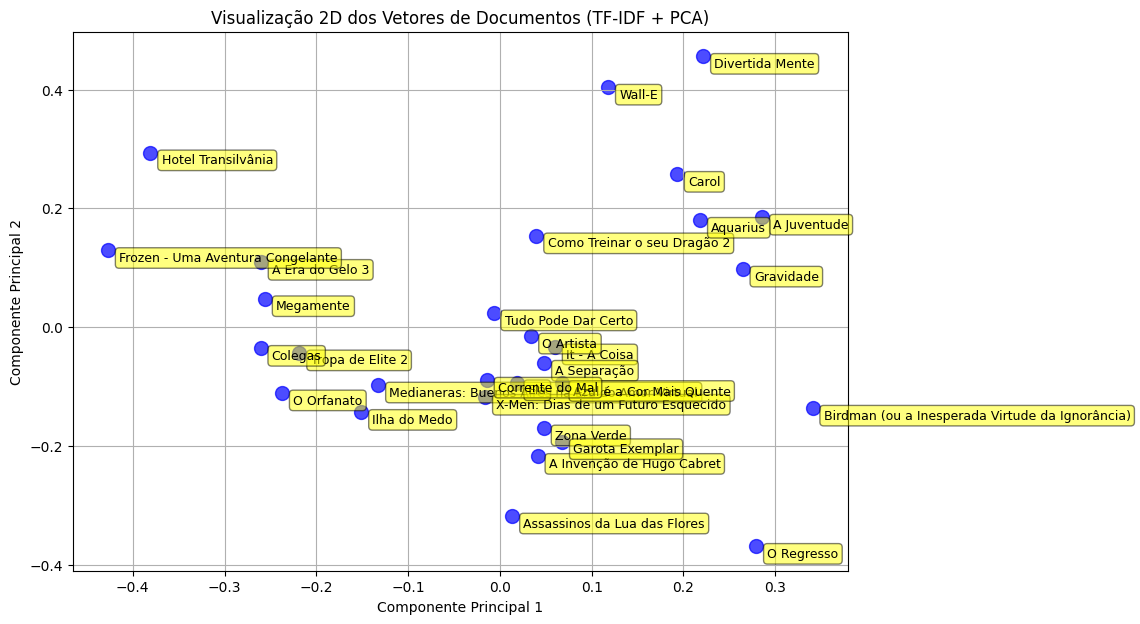

In [37]:
pca = PCA(n_components=2, random_state=42)
X_tfidf_pca = pca.fit_transform(x_tfidf_filmes_tokens.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(X_tfidf_pca[:, 0], X_tfidf_pca[:, 1], c='blue', alpha=0.7, s=100)
plt.title("Visualização 2D dos Vetores de Documentos (TF-IDF + PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)

for i, corpus in enumerate(corpus_filmes_tokens):
    nome = data_filmes_processados['nome'][i]
    plt.annotate(nome, (X_tfidf_pca[i, 0], X_tfidf_pca[i, 1]),
                 xytext=(8, -8), textcoords='offset points', fontsize=9,
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5))
plt.show()

Cluster TF-IDF Stem

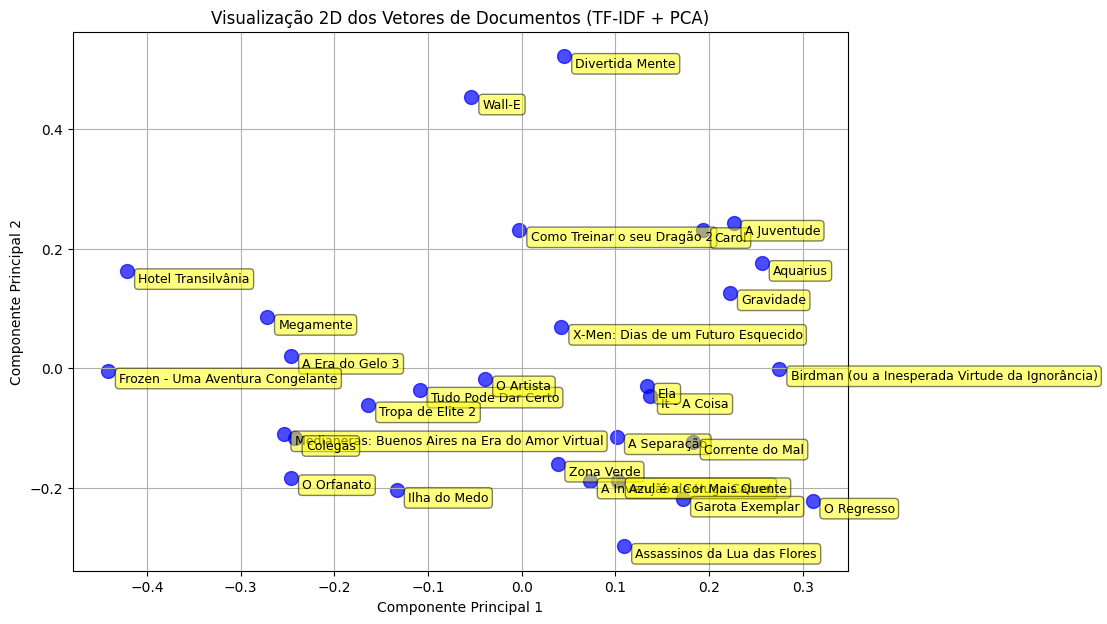

In [38]:
pca = PCA(n_components=2, random_state=42)
X_tfidf_pca = pca.fit_transform(x_tfidf_filmes_stems.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(X_tfidf_pca[:, 0], X_tfidf_pca[:, 1], c='blue', alpha=0.7, s=100)
plt.title("Visualização 2D dos Vetores de Documentos (TF-IDF + PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)

for i, corpus in enumerate(corpus_filmes_stems):
    nome = data_filmes_processados['nome'][i]
    plt.annotate(nome, (X_tfidf_pca[i, 0], X_tfidf_pca[i, 1]),
                 xytext=(8, -8), textcoords='offset points', fontsize=9,
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5))
plt.show()

Cluster TF-IDF Lemas

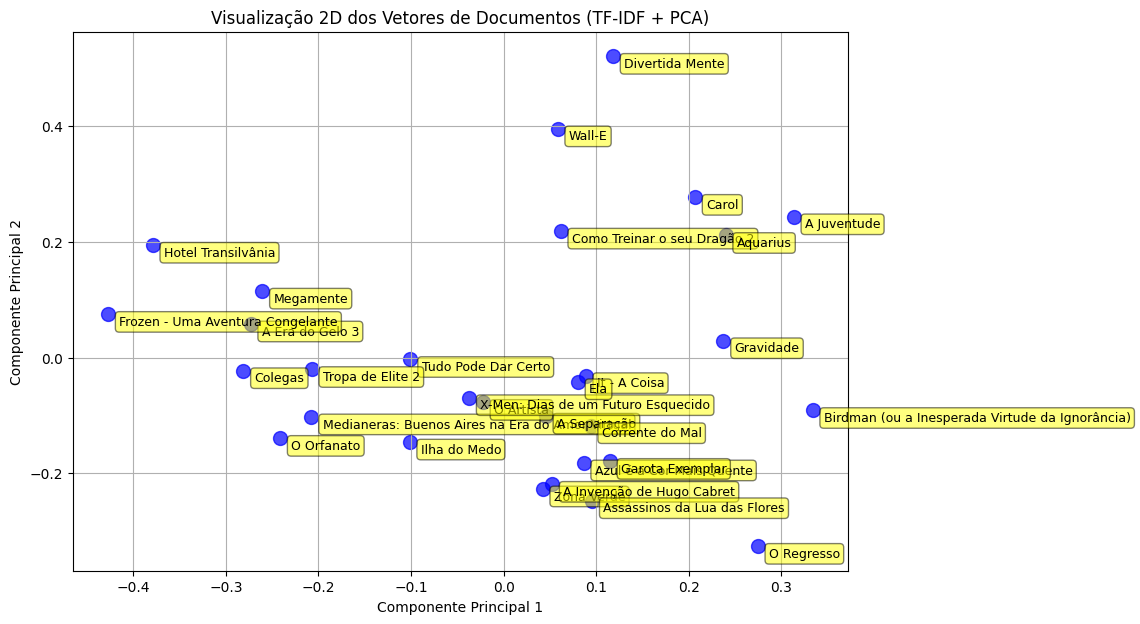

In [39]:
pca = PCA(n_components=2, random_state=42)
X_tfidf_pca = pca.fit_transform(x_tfidf_filmes_lemas.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(X_tfidf_pca[:, 0], X_tfidf_pca[:, 1], c='blue', alpha=0.7, s=100)
plt.title("Visualização 2D dos Vetores de Documentos (TF-IDF + PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)

for i, corpus in enumerate(corpus_filmes_lemmas):
    nome = data_filmes_processados['nome'][i]
    plt.annotate(nome, (X_tfidf_pca[i, 0], X_tfidf_pca[i, 1]),
                 xytext=(8, -8), textcoords='offset points', fontsize=9,
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5))
plt.show()

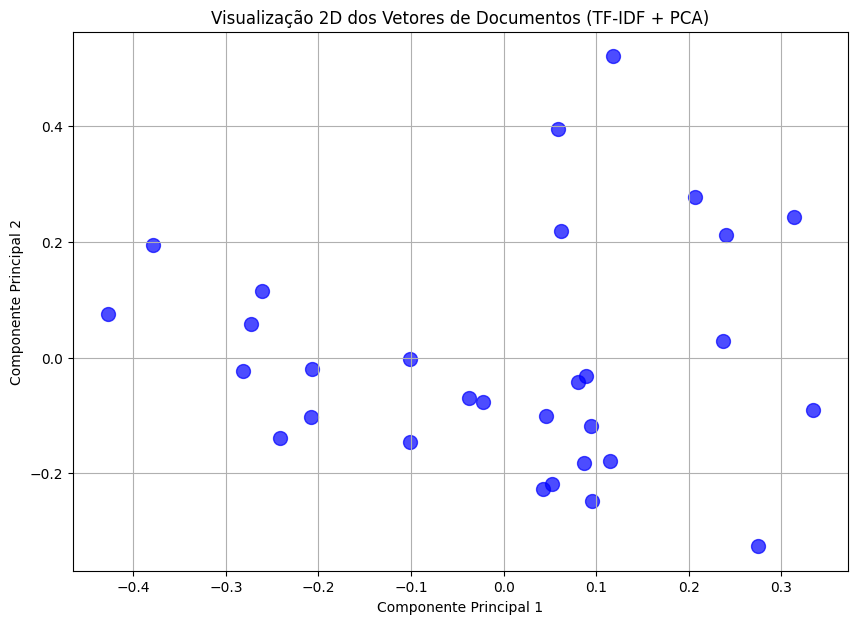

In [41]:
import mplcursors

pca = PCA(n_components=2, random_state=42)
X_tfidf_pca = pca.fit_transform(x_tfidf_filmes_lemas.toarray())

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tfidf_pca[:, 0], X_tfidf_pca[:, 1], c='blue', alpha=0.7, s=100)
plt.title("Visualização 2D dos Vetores de Documentos (TF-IDF + PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)

labels = data_filmes_processados['nome'].tolist()

cursor = mplcursors.cursor(scatter, hover=True)
@cursor.connect("add")
def on_add(sel):
    sel.annotation.set_text(labels[sel.index])

plt.show()